# Curve Fitting and overfitting

In [4]:
# We will be using SciPY Python library for mathematics,science and engineering
# https://www.scipy.org/ comes with Anaconda
# Most important external Python library NumPy library underneath: http://www.numpy.org/
# Data from the book
# Building Machine Learning Systems with Python
# by Willi Richert and Luis Pedro Coelho
# published by PACKT Publishing

# It is made available under the MIT License
import scipy as sp
import pandas as pd
import numpy as np

print(f"SciPy version: {sp.__version__}")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

# date
from datetime import datetime
print(f"Today is {datetime.now()}")
# python version
import sys
print(f"Python version: {sys.version}")

SciPy version: 1.16.3
Pandas version: 2.2.2
NumPy version: 2.0.2
Today is 2026-01-16 07:10:12.548224
Python version: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]


In [5]:
url = "https://raw.githubusercontent.com/ValRCS/RBS_LIFT_AI_ML_Models/refs/heads/main/data/web_traffic.tsv"
df = pd.read_csv(url, sep='\t', header=None, names=['date', 'visitors'])
print(f"Shape of the data: {df.shape}")
# now let's get data as a numpy array
data = df.values

Shape of the data: (743, 2)


In [3]:
df.head()

,date,visitors
0,1,2272.0
1,2,NaN
2,3,1386.0
3,4,1365.0
4,5,1488.0


In [6]:
# lets have df_clean withou nan
df_clean = df.dropna()
df.shape, df_clean.shape

((743, 2), (735, 2))

In [7]:
# so values for pandas dataframe columns give us the underlaying numpy array the raw data so to speak
x = df_clean['date'].values
y = df_clean['visitors'].values

In [8]:
# Visualizating our data
import matplotlib.pyplot as plt

In [9]:
735 // 24 # so roughly 30 days

30

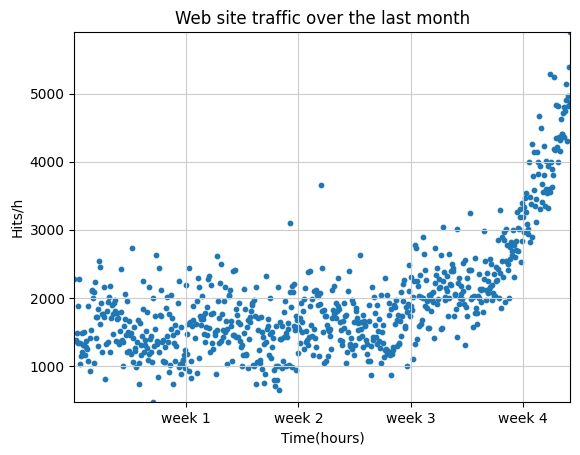

In [14]:
# plot the (x,y) points with dots of size 10
plt.scatter(x, y, s=10)
plt.title("Web site traffic over the last month")
plt.xlabel("Time(hours)")
plt.ylabel("Hits/h")
NUM_WEEKS = 4 + 1
plt.xticks([w*7*24 for w in range(NUM_WEEKS)],
          [f'week {w}' for w in range(NUM_WEEKS)])
plt.autoscale(tight=True)
# you can adjust grid style as much as you want
plt.grid(True, linestyle='-', color='0.80')
# I can also save it
plt.savefig("web_traffic.png")
plt.show()
# more on https://matplotlib.org/stable/plot_types/index.html plot types

### Question when will our traffic reach 50,000 hits an hour ? (We'll need a new server by then..)

## We will need to extrapolate with some model

# All models are wrong, but some models are useful

https://en.wikipedia.org/wiki/All_models_are_wrong

In [15]:
#### Error function
# f is our model here
# x is our independent variable
# y is the truth

def error(f, x, y):
    return np.sum((f(x)-y)**2) # so we calculate individual error / residual and square
    # smells like RMS - root mean square error but not quite - we did not take average just TOTAL not yet mean

# NumPy thus SciPy strength is vectorized functions, we do all calculations at once or near once, good for larger datasets!

## Could our data be a simple linear progression (straight line )?

In [16]:
#SciPY has polyfit function
fp1, residuals, rank, sv, rcond = np.polyfit(x, y, 1, full=True)

In [17]:
print(f"Model Parameters {fp1}")

Model Parameters [  2.59619213 989.02487106]


In [ ]:
# 1st degree f(x)= ax+b
# so a scikit learn would call coefficient
# and b would be intercept

In [ ]:
# this means f(x) = 2.59619213 * x + 989.02487106 is our linear function

In [18]:
#Error so already built in
print(residuals)

[3.17389767e+08]


In [19]:
# poly1d() to create a model function from the model parameters
f1 = np.poly1d(fp1)
err1=error(f1, x, y) # so our hand crafted function is the same
err1 # so this is squared error sum (without mean)

np.float64(317389767.33977807)

In [20]:
type(f1) # we can call this to find values

numpy.poly1d

Calculating predicted y values for x from 0 to 743


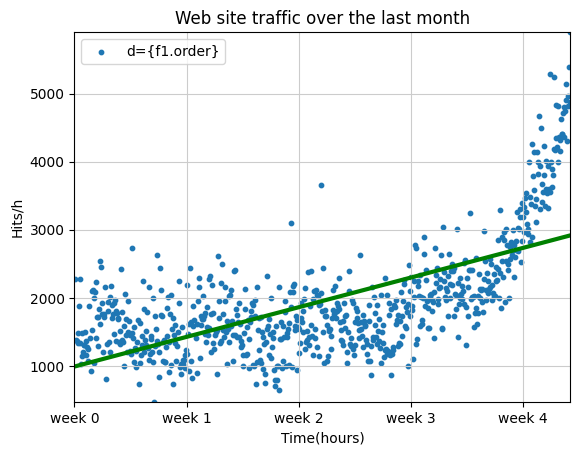

In [24]:
plt.scatter(x, y, s=10)
plt.title("Web site traffic over the last month")
plt.xlabel("Time(hours)")
plt.ylabel("Hits/h")
plt.xticks([w*7*24 for w in range(10)],
          [f'week {w}' for w in range(10)])
plt.autoscale(tight=True)
plt.grid(True, linestyle='-', color='0.80')
print(f"Calculating predicted y values for x from 0 to {x[-1]}")
fx = np.linspace(0,x[-1], 1000) # generate X-values for plotting
# 1000 means I want 1000 values from 0 to whatever last value in x[-1]
plt.plot(fx, f1(fx), linewidth=3, color="green") # we calculate the PREDICTED values here for 1000
plt.legend(["d={f1.order}"], loc="upper left")

plt.show()

### Hmm first 3-4 weeks seem OK, but then what happens? Is our model really linear?

In [25]:
## Absolute errors not useful but good for comparing to other values
err1

np.float64(317389767.33977807)

In [26]:
# Lets try a 2nd order function(square)
f2p = np.polyfit(x, y, 2)
f2p

array([ 1.05322215e-02, -5.26545650e+00,  1.97476082e+03])

In [ ]:
# f2(x)=ax^2 + bx + c  in our case 1.05322215e-02, -5.26545650e+00,  1.97476082e+03

In [27]:
f2 = np.poly1d(f2p) # we need a function from what we just generated
err2 = error(f2, x, y)
err2

np.float64(179983507.8781792)

In [28]:
# let's calculate RMSE then for each
# we know we have 735 values
len(x)

735

In [29]:
rmse1 = np.sqrt(err1/len(x))
rmse2 = np.sqrt(err2/len(x))
print(f"RMSE for f1: {rmse1} and f2: {rmse2}")
# this is easier to reason about

RMSE for f1: 657.1322642415156 and f2: 494.84898799804853


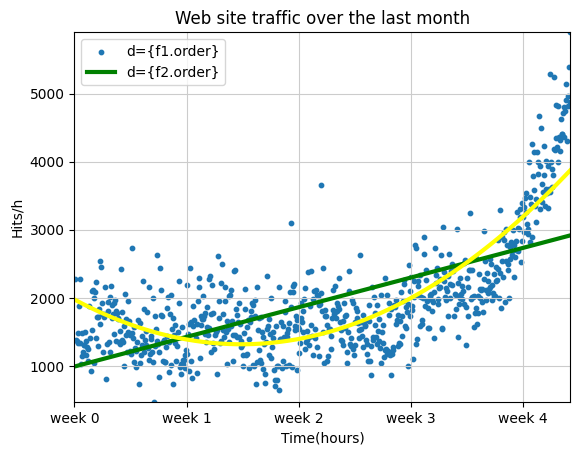

In [30]:
plt.scatter(x, y, s=10)
plt.title("Web site traffic over the last month")
plt.xlabel("Time(hours)")
plt.ylabel("Hits/h")
plt.xticks([w*7*24 for w in range(10)],
          [f'week {w}' for w in range(10)])
plt.autoscale(tight=True)
plt.grid(True, linestyle='-', color='0.80')

fx = np.linspace(0,x[-1], 1000) # generate X-values for plotting
plt.plot(fx, f1(fx), linewidth=3, color="green")
#plt.legend(["d={f1.order}"], loc="upper left")

plt.plot(fx, f2(fx), linewidth=3, color="yellow")
plt.legend(["d={f1.order}","d={f2.order}"], loc="upper left")

plt.show()

In [31]:
colors = ['g', 'k', 'b', 'm', 'r', 'y']
linestyles = ['-', '-.', '--', ':', '-'] # look to matplotlib documentation for more styles
def plot_models(x, y, models, fname=None, mx=None, ymax=None, xmin=None, maxhours=None):
    ''' plot input data '''

    plt.figure(num=None, figsize=(10, 8))
    plt.clf()
    plt.scatter(x, y, s=10)
    plt.title("Web traffic over the last month")
    plt.xlabel("Time")
    plt.ylabel("Hits/hour")
    plt.xticks(
        [w * 7 * 24 for w in range(10)], [f'week {w}' for w in range(10)])

    # legend_text = ["Ground truth -]
    plt.legend("Ground truth", loc="upper left")
    if models:
        if mx is None:
            if maxhours is None:
                mx = np.linspace(0, x[-1], 1000)
            else:
                mx = np.linspace(0, maxhours, 1000)
        for model, style, color in zip(models, linestyles, colors):
            # print "Model:",model
            # print "Coeffs:",model.coeffs
            plt.plot(mx, model(mx), linestyle=style, linewidth=2, c=color)

        plt.legend([f"d={m.order}" for m in models], loc="upper left")

    plt.autoscale(tight=True)
    plt.ylim(ymin=0)
    if ymax:
        plt.ylim(ymax=ymax)
    if xmin:
        plt.xlim(xmin=xmin)
    plt.grid(True, linestyle='-', color='0.75')
    if fname != None:
        plt.savefig(fname)

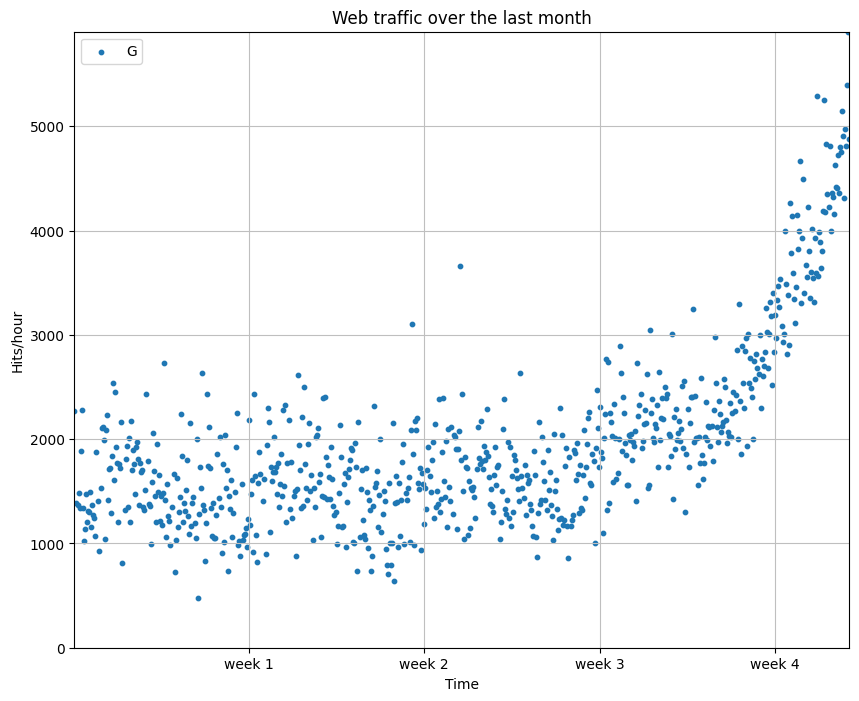

In [32]:
plot_models(x, y, None, "nomodels.png")

In [33]:
models=[f1,f2] # so f1 and f2 are the functions that I am passing

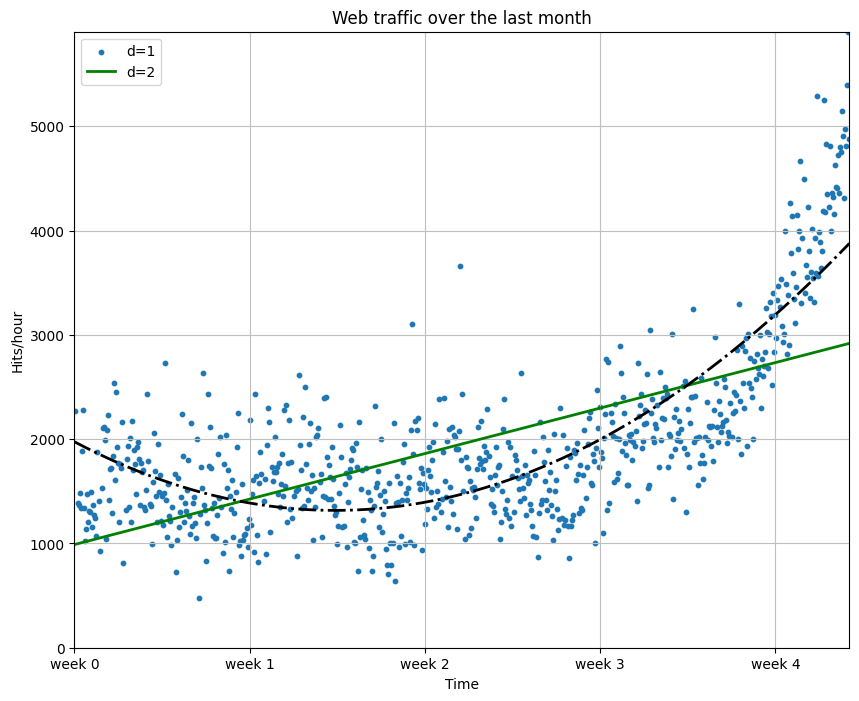

In [34]:
plot_models(x, y, models, "models.png")

## Higher Polynomial models

So let's try 3rd(cubic), and let's try some higher value polynomials.

In [35]:
f3 = np.poly1d(np.polyfit(x, y, 3))
f10 = np.poly1d(np.polyfit(x, y, 10))
f15 = np.poly1d(np.polyfit(x, y, 15))

In [36]:
# we add our models to our list of models
models+=[f3,f10]
models+=[f15]

In [37]:
models

[poly1d([  2.59619213, 989.02487106]),
 poly1d([ 1.05322215e-02, -5.26545650e+00,  1.97476082e+03]),
 poly1d([ 3.04960132e-05, -2.35893797e-02,  4.94226019e+00,  1.33328797e+03]),
 poly1d([-3.73981968e-22,  1.36473756e-18, -2.14294406e-15,  1.89884971e-12,
        -1.04570108e-09,  3.70867731e-07, -8.45604588e-05,  1.19167041e-02,
        -9.41618606e-01,  3.33703840e+01,  1.26421204e+03]),
 poly1d([-1.75010729e-33,  9.34970133e-30, -2.23812240e-26,  3.17325874e-23,
        -2.96996360e-20,  1.93808917e-17, -9.09469450e-15,  3.12658886e-12,
        -7.96351220e-10,  1.50887517e-07, -2.10735877e-05,  2.09371923e-03,
        -1.36560935e-01,  5.02675084e+00, -7.86093043e+01,  1.84096107e+03])]

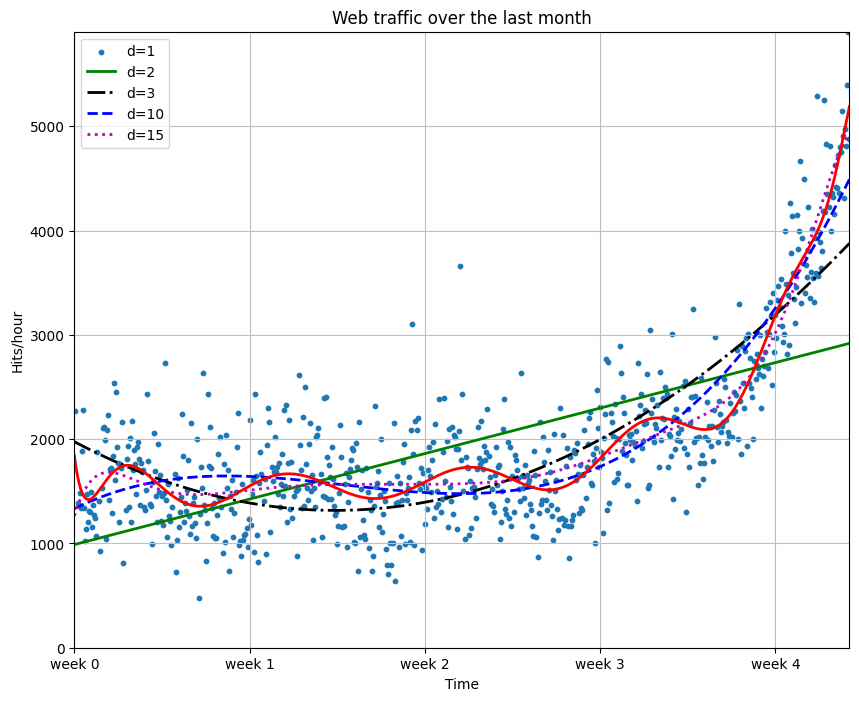

In [38]:
plot_models(x,y, models, "mod5.png") # so dot is actually displayed

In [39]:
for m in models:
    # print(f"{m} \nError: {error(m, x, y)}\n")
    # let's calculate RMSE as well
    rmse = np.sqrt(error(m, x, y)/len(x))
    print(f"RMSE: {rmse}\n")

RMSE: 657.1322642415156

RMSE: 494.84898799804853

RMSE: 435.4216722858714

RMSE: 407.31796796274557

RMSE: 391.19950341434827



## Inflection point (human look)

In [40]:
inflection = int(3.5*7*24) # calculate the inflection point in hours
xa = x[:inflection] # data before the inflection point
ya = y[:inflection]
xb = x[inflection:] # data after
yb = y[inflection:]
fa = np.poly1d(np.polyfit(xa, ya, 1))
fb = np.poly1d(np.polyfit(xb, yb, 1))
fa_error = error(fa, xa, ya)
fb_error = error(fb, xb, yb)


In [41]:
for m in [fa,fb]:
    print(f"{m} \nError: {error(m, x, y)}\n")

 
0.8399 x + 1400 
Error: 465906112.07376736

 
21.07 x - 1.092e+04 
Error: 30035502983.248444



In [ ]:
## Trusting Error

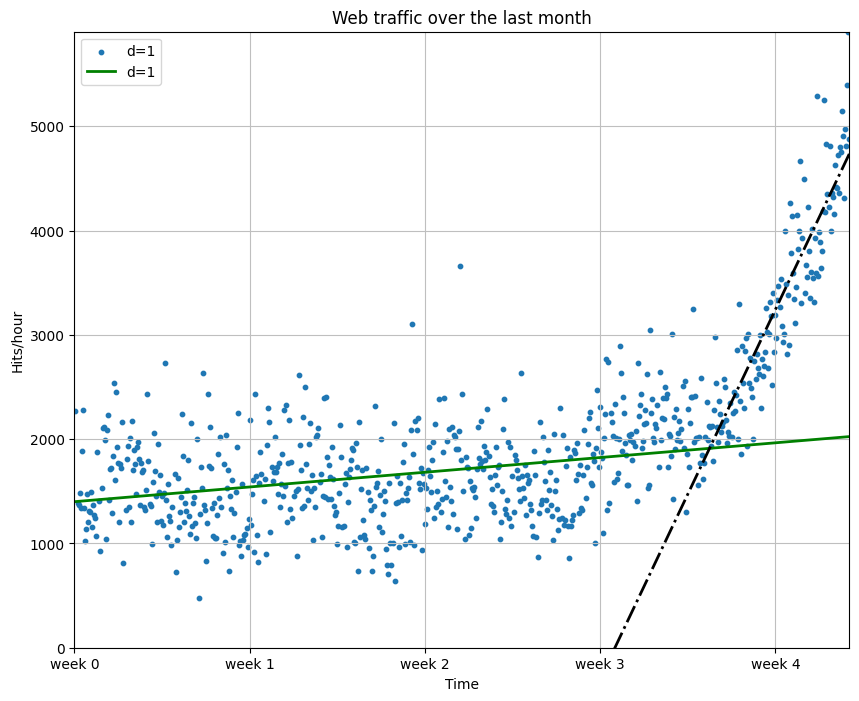

In [42]:
plot_models(x,y, [fa,fb], "modab.png")

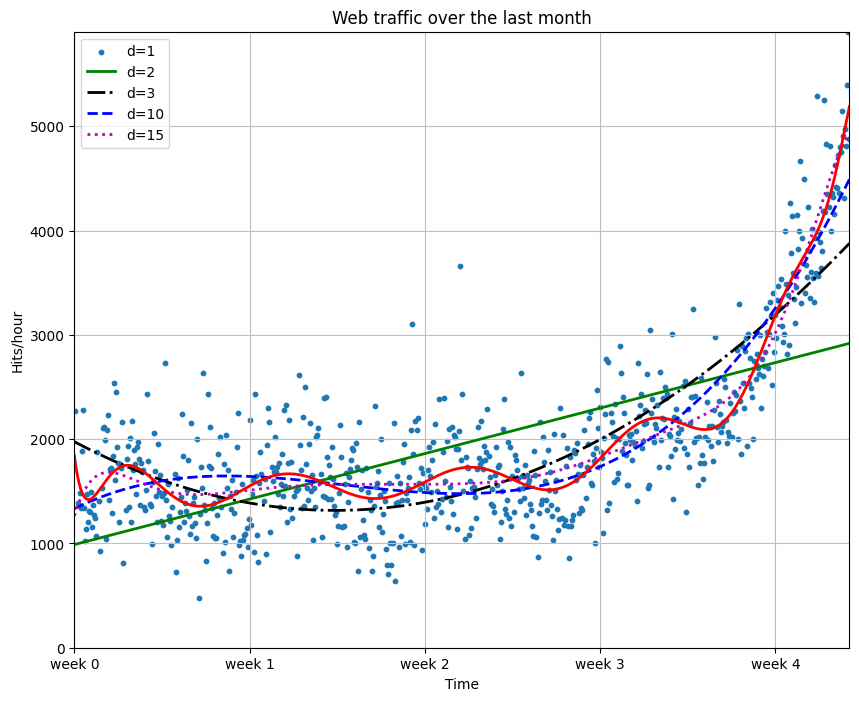

In [43]:
plot_models(x,y, models)

In [44]:
mx = np.linspace(0, 1200, 1000)
# so about 1200-743 more hours so about

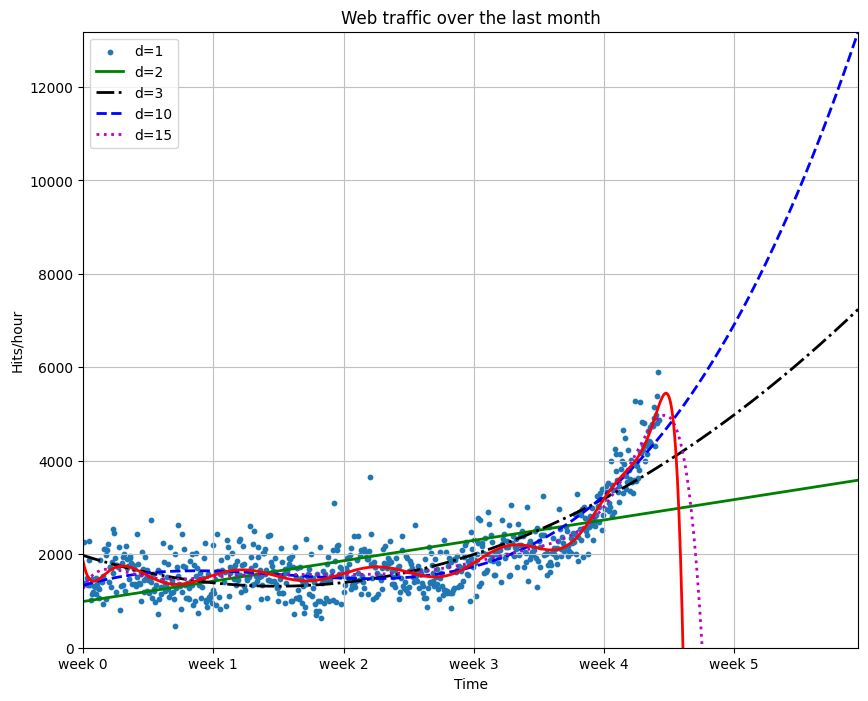

In [45]:
plot_models(x,y, models, maxhours=1000)

# Bad case of overfitting!! on d10 and d15

In [ ]:
plot_models(x,y, [fa,fb], maxhours=1000)

In [ ]:
# Solving equations

In [46]:
from scipy.optimize import fsolve
print(fb)
print(fb - 500000)
reached_max = fsolve(fb - 50000, x0=800) / (7 * 24) # x0 is the starting estimate for speedup
print(f"50,000 hits/hour expected in week {reached_max[0]}")

 
21.07 x - 1.092e+04
 
21.07 x - 5.109e+05
50,000 hits/hour expected in week 17.207845638622224


In [ ]:
reached_max

In [ ]:
# Solve documentation https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.optimize.fsolve.html

## Conclusions

Nature (and business and elsewhere) rarely has processes that can be described as a higher level polynomial.

We want models that generalize (predict) well not models that perfectly describe existing data!

We might have exponential processed then we would take log and use linear models.